In [1]:
#starting with their imports
%matplotlib inline
import pandas as pd
import numpy as np
import os, sys, subprocess
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
#from tqdm import tqdm

#my imports
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Jay\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#then next few cells is how they bring in their data:

# ROOT_DIR - root directory
ROOT_DIR = os.getcwd()+'/'

# FEATURE_DIR - directory where feature dataframes are saved
DATA_DIR = ROOT_DIR + 'dataframes/'

In [3]:
#load their data
DF_prest = pd.concat([pd.read_csv(DATA_DIR+'DF_prest_features_1.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_2.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_3.csv',index_col=0),
                      pd.read_csv(DATA_DIR+'DF_prest_features_4.csv',index_col=0)])
print ('Number of peptides:', len(DF_prest))

Number of peptides: 45206


In [4]:
DF_prest.head(1)

,prest_id,uniprot_id,conc_cf,aa_seq,nt_seq,aa_len,true_nt_seq,AAA,AAT,AAC,...,disembl_HOTLOOPS_frac,ronn_avg,ronn_results,ronn_frac,disopred_results,disopred_avg,disopred_pb_results,disopred_pb_avg,disopred_frac,disopred_pb_frac
0,140095,G3V3N0,4.3075,IMTAPSSFEQFKVAMNYLQLYNVPDCLEDIQDADCSSSKCSSSASS...,GACAAGCTTGCGGCCGCAATTATGACAGCTCCCTCCAGTTTTGAGC...,139,ATTATGACAGCTCCCTCCAGTTTTGAGCAGTTTAAAGTGGCAATGA...,0.057554,0.043165,0.021583,...,0.410072,0.495827,imtapssfeqfkvamnylqlynvpdclediqDADCSSSKCSSSASS...,0.482014,ImtapssfeqfkvamnylqlynvpdclediqdadcsSSKCSSSASS...,0.38705,-...................................^^^^^^^^^^...,0.31777,0.388489,0.359712


In [5]:
aa_features = ['list_comp_A','list_comp_R','list_comp_N',
               'list_comp_D','list_comp_C','list_comp_Q','list_comp_E','list_comp_G',
               'list_comp_H','list_comp_I','list_comp_L','list_comp_K','list_comp_M',
               'list_comp_F','list_comp_P','list_comp_S','list_comp_T','list_comp_W',
               'list_comp_Y','list_comp_V',
               # Amino acid types
               'frac_aliphatic', 'frac_uncharged_polar', 'frac_polar',
               'frac_hydrophobic', 'frac_positive', 'frac_sulfur', 'frac_negative', 'frac_amide',
               'frac_alcohol']

disorder_features = ['disembl_COILS_frac','disembl_REM465_frac','disembl_HOTLOOPS_frac','ronn_avg','ronn_frac',
                    'disopred_avg','disopred_pb_avg','disopred_frac','disopred_pb_frac']

                    
phys_features = ['aa_len',                                        
                # Physical properties
                 'bio_pI','bio_mW','bio_aromaticity','bio_instability','bio_gravy','abs_avg_charge','abs_charge',
                 'avg_charge']
                    
rna_features = ['AAA','AAC','AAT','AAG','ACA','ACC','ACT','ACG','ATA','ATC','ATT','ATG','AGA','AGC','AGT',
                'AGG','CAA','CAC','CAT','CAG','CCA','CCC','CCT','CCG','CTA','CTC','CTT','CTG','CGA','CGC',
                'CGT','CGG','TAA','TAC','TAT','TAG','TCA','TCC','TCT','TCG','TTA','TTC','TTT','TTG','TGA',
                'TGC','TGT','TGG','GAA','GAC','GAT','GAG','GCA','GCC','GCT','GCG','GTA','GTC','GTT','GTG',
                'GGA','GGC','GGT','GGG',
                'GC_content','list_nuc_A','list_nuc_C','list_nuc_G','list_nuc_T',
                'GC30',
                # SD sequences
                'sd_like_fwd','sd_like_fwd_frac','sd_like_rev','sd_like_rev_frac','sd_seq_fwd',
                'sd_seq_fwd_frac','sd_seq_rev','sd_seq_rev_frac',
                # RNA folding
                'RNA_folding_energy','RNA_40_energy','tAI']
                    
ss_features = ['acc20_mean','ss_helix', 'ss_ext', 'ss_c', 'ss8_helix', 'ss8_ext', 'ss8_turn', 'ss8_helix3',
               'ss8_pi_helix', 'ss8_bridge', 'ss8_bend', 'ss8_coil', 'acc_frac',
               'in_gravy','out_gravy', 'acc_hydrophilic_in','acc_hydrophilic_out',
               'acc_hydrophobic_in','acc_hydrophobic_out']

list_of_features = aa_features+disorder_features+phys_features+rna_features+ss_features

#changed this part of their code so I bring in all of the data instead of just the to and bottom 25%
DF_prest_features = DF_prest[list_of_features]

In [6]:
print(len(list_of_features))
DF_prest_features.head()

147


,list_comp_A,list_comp_R,list_comp_N,list_comp_D,list_comp_C,list_comp_Q,list_comp_E,list_comp_G,list_comp_H,list_comp_I,...,ss8_bridge,ss8_bend,ss8_coil,acc_frac,in_gravy,out_gravy,acc_hydrophilic_in,acc_hydrophilic_out,acc_hydrophobic_in,acc_hydrophobic_out
0,0.057554,0.057554,0.064748,0.057554,0.050360,0.035971,0.071942,0.043165,0.007194,0.021583,...,0.000000,0.014388,0.546763,0.625899,0.599281,-1.199281,0.057554,0.438849,0.294964,0.115108
1,0.111111,0.069444,0.027778,0.000000,0.027778,0.020833,0.118056,0.076389,0.013889,0.020833,...,0.000000,0.013889,0.423611,0.638889,0.378472,-0.747917,0.069444,0.291667,0.263889,0.215278
2,0.066176,0.139706,0.110294,0.044118,0.058824,0.044118,0.000000,0.022059,0.044118,0.051471,...,0.022059,0.117647,0.235294,0.588235,0.360294,-0.994853,0.066176,0.323529,0.323529,0.176471
3,0.089431,0.056911,0.097561,0.073171,0.024390,0.056911,0.065041,0.048780,0.008130,0.008130,...,0.000000,0.008130,0.430894,0.674797,0.312195,-1.328455,0.073171,0.439024,0.235772,0.162602
4,0.072581,0.072581,0.016129,0.000000,0.072581,0.080645,0.080645,0.064516,0.056452,0.024194,...,0.000000,0.008065,0.395161,0.685484,0.572581,-1.391129,0.048387,0.379032,0.258065,0.193548


In [7]:
#select the top predictors from the paper
top_ten = ['bio_pI', #Grand avg hydropathy
          'list_comp_L', 'avg_charge', 'frac_polar', 'ss8_ext', 'acc_hydrophobic_in', #extended secondary structure (3-letter)
          'list_comp_Y'] #Average GRAVY]

In [27]:
#combine the predictors and the concentrations so I can down sample the data
#df = pd.concat([DF_prest['conc_cf'], DF_prest_features[top_ten]], axis=1 )
df = pd.concat([DF_prest['conc_cf'], DF_prest_features], axis=1 )

ss = StandardScaler()
ss.fit(df)
df_ss = ss.transform(df)
df_ss = pd.DataFrame(data=df_ss, columns=df.columns)
df_ss.head()

,conc_cf,list_comp_A,list_comp_R,list_comp_N,list_comp_D,list_comp_C,list_comp_Q,list_comp_E,list_comp_G,list_comp_H,...,ss8_bridge,ss8_bend,ss8_coil,acc_frac,in_gravy,out_gravy,acc_hydrophilic_in,acc_hydrophilic_out,acc_hydrophobic_in,acc_hydrophobic_out
0,-0.377495,-0.228308,0.003387,0.922716,0.237746,1.092302,-0.420885,-0.020145,-0.495616,-0.835944,...,-0.201190,-0.325848,1.210587,0.064624,-0.105168,-0.193790,0.215458,0.721434,-0.101331,-0.660532
1,-0.858426,1.129708,0.318638,-0.372085,-1.589432,0.221631,-0.890401,1.038559,0.335792,-0.553003,...,-0.201190,-0.340211,0.443719,0.163959,-0.962480,1.012643,0.506092,-0.735184,-0.435633,1.077579
2,-1.351655,-0.009672,2.181475,2.517854,-0.188819,1.418633,-0.168215,-1.671860,-1.023805,0.724576,...,2.984825,2.642818,-0.728936,-0.223401,-1.033058,0.352616,0.426214,-0.419848,0.205971,0.404211
3,0.456783,0.579976,-0.013671,2.071905,0.733535,0.091021,0.228570,-0.178602,-0.355102,-0.796392,...,-0.201190,-0.505776,0.489072,0.438555,-1.219808,-0.539056,0.597172,0.723170,-0.738107,0.163562
4,-0.696261,0.152715,0.401788,-0.780055,-1.589432,1.949054,0.964721,0.179659,0.038679,1.245855,...,-0.201190,-0.507661,0.266561,0.520282,-0.208833,-0.706575,-0.008604,0.129447,-0.498291,0.700539


In [28]:
#down sample the dataset so training can go faster
print(df_ss.shape)
df_ss = df_ss.sample(frac=0.05) 
print(df_ss.shape)

(45206, 148)
(2260, 148)


In [29]:
#Move predictors to X and values to y
X = df_ss.iloc[:,1:]
# y = df['conc_cf']
y = df_ss['conc_cf']
# print(y.shape)
print('df_ss.shape', df_ss.shape)
print('X.shape=', X.shape)
print('y.shape=', y.shape)

df_ss.shape (2260, 148)
X.shape= (2260, 147)
y.shape= (2260,)


In [30]:
#Make a test train split
X, Xt, y, yt = train_test_split(X, y, test_size=0.33, random_state=27315)
print('X_train.shape=', X.shape)
print('y_train.shape=', y.shape)

X_train.shape= (1514, 147)
y_train.shape= (1514,)


0.999999999981939
-0.029818461568875465


<Container object of 147 artists>

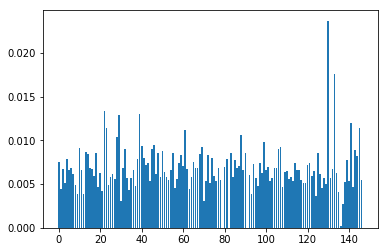

In [34]:
# train a random forest to feature prune
etr = ExtraTreesRegressor(n_estimators=10)
etr.fit(X,y)
print(etr.score(X,y))
print(etr.score(Xt,yt))
plt.bar(range(X.shape[1]), etr.feature_importances_)

In [38]:
etr_pred_Xt = etr.predict(Xt)
etr_pred_X = etr.predict(X)


Text(0.5,1,'Parity Plot (ETR)')

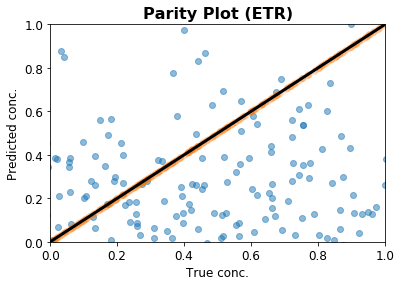

In [40]:
#Parity plot
ax_min = 0
ax_max = 1

plt.scatter(yt, etr_pred_Xt, alpha=.5)
plt.scatter(y, etr_pred_X, alpha=.1)
plt.plot([ax_min, ax_max], [ax_min, ax_max], color='k', 
         label = 'Perfect Prediction', linewidth=3)


plt.ylim(ax_min, ax_max)
plt.xlim(ax_min, ax_max)
plt.xlabel('True conc.', fontsize=12)
plt.ylabel('Predicted conc.', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Parity Plot (ETR)', fontsize = 16, weight='bold')


In [24]:
a = range(X.shape[1])
inds = zip(etr.feature_importances_, a)
inds = sorted(inds, reverse=True)
inds = np.array(inds)
inds = list(inds[:50,1].astype('int'))
X = X[:,inds]
Xt = Xt[:,inds]
# print(inds[:100,])

In [32]:
#initilize the model
from keras.layers import Dropout
model = Sequential()
model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='selu'))
model.add(Dense(240, activation='selu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='selu'))
model.add(Dense(1))
#model.add(Dense(1, activation='linear'))
# keras.losses.
model.compile(loss = keras.losses.mae, #loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta())

#fit the model
model.fit(X, y,
          batch_size=64,
          epochs=50,
          verbose=1,
          validation_data=(Xt, yt))

Train on 1514 samples, validate on 746 samples
Epoch 1/50
1514/1514 [==============================] - 1s 575us/step - loss: 1.3685 - val_loss: 0.9171
Epoch 2/50
1514/1514 [==============================] - 0s 175us/step - loss: 1.0211 - val_loss: 1.0078
Epoch 3/50
1514/1514 [==============================] - 0s 177us/step - loss: 0.9537 - val_loss: 0.9088
Epoch 4/50
1514/1514 [==============================] - 0s 187us/step - loss: 0.8945 - val_loss: 0.8903
Epoch 5/50
1514/1514 [==============================] - 0s 175us/step - loss: 0.8759 - val_loss: 0.9235
Epoch 6/50
1514/1514 [==============================] - 0s 185us/step - loss: 0.8604 - val_loss: 0.8449
Epoch 7/50
1514/1514 [==============================] - 0s 245us/step - loss: 0.8280 - val_loss: 0.8969
Epoch 8/50
1514/1514 [==============================] - 0s 176us/step - loss: 0.8011 - val_loss: 0.8673
Epoch 9/50
1514/1514 [==============================] - 0s 176us/step - loss: 0.8037 - val_loss: 0.9226
Epoch 10/50
1514/

In [41]:
# print(X_test)
nn_pred_Xt = model.predict(Xt)
nn_pred_X = model.predict(X)

# print(pred)

Text(0.5,1,'Parity Plot')

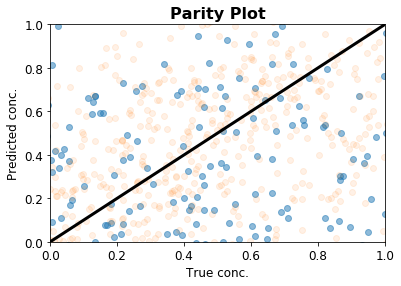

In [43]:
#Parity plot
ax_min = 0
ax_max = 1

plt.scatter(yt, nn_pred_Xt, alpha=.5)
plt.scatter(y, nn_pred_X, alpha=.1)

plt.plot([ax_min, ax_max], [ax_min, ax_max], color='k', 
         label = 'Perfect Prediction', linewidth=3)


plt.ylim(ax_min, ax_max)
plt.xlim(ax_min, ax_max)
plt.xlabel('True conc.', fontsize=12)
plt.ylabel('Predicted conc.', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Parity Plot', fontsize = 16, weight='bold')
#plt.legend(fontsize = 20)